In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.pseudo_scalar_mediator import PseudoScalarMediator, PseudoScalarMFV
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.parameters import up_quark_mass as muq
from hazma.parameters import down_quark_mass as mdq
from hazma.parameters import strange_quark_mass as msq
from hazma.parameters import electron_mass as me
from hazma.parameters import muon_mass as mmu
from hazma.parameters import b0, fpi, vh

from utilities import get_color, get_tex_label, latex_text_width_1col

Check that mixing angle and $\pi^0$ mass shift are small for benchmark parameters:

In [2]:
psm = PseudoScalarMediator(mx=200., mp=1e3, gpxx=1., gpuu=muq/vh, gpdd=-mdq/vh, gpss=-msq/vh, gpee=0., gpmumu=0., gpGG=1., gpFF=7./9.)

print "beta = ", psm.beta
print "mpi0, mpi0 (shifted) = ", mpi0, psm.mpi0

beta =  4.65710475383e-06
mpi0, mpi0 (shifted) =  134.9766 134.97659992112156


## Branching fractions as a function of $m_\chi$

The couplings below are the benchmark type III/lepton-specific 2HDM ones. For other 2HDMs, the couplings obey the relationships

* Type I: $g_{Pu} = -g_{Pd} = g_{P\ell}$
* Type II (MSSM-liked): $g_{Pu} = 1$, $g_{Pd} = g_{P\ell} = 0$
* Flipped/type Y: $g_{Pu} = g_{P\ell} = 0$, $g_{Pd} = 0$,

where I set the coupling to leptons to zero when possible.

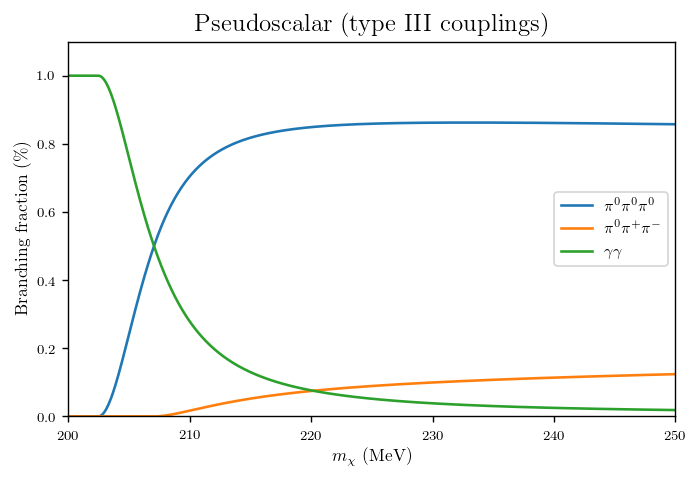

In [7]:
mx_min, mx_max, n_mxs = 200., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

# Lepton-specific/type III 2HDM couplings
gpuu = 1.
gpdd = -1.
gpll = 0.

# General relations for MFV couplings
gpGG = 2*gpuu + gpdd
gpFF = gpll + (8.*gpuu + gpdd) / 9.

psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1., gpuu=gpuu, gpdd=gpdd,
                      gpll=gpll, gpGG=gpGG, gpFF=gpFF)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    psm.mx = mx
    e_cm = 2. * psm.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(psm.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in psm.list_final_states()}

### Make the plot
plt.figure(figsize=(latex_text_width_1col, 4))

for fs, bf_list in bfs.iteritems():
    if fs in ["g g", "pi0 pi0 pi0", "pi0 pi pi"]:
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

plt.title("DM annihilation, pseudoscalar mediator")
plt.title("Pseudoscalar (type III couplings)")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel("Branching fraction (\%)")
plt.legend(loc="center right")
plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.1)

plt.tight_layout()

plt.savefig("figures/pseudoscalar_branching_fractions_mfv.pdf")

## Cross section
DM annihilation is $s$-wave

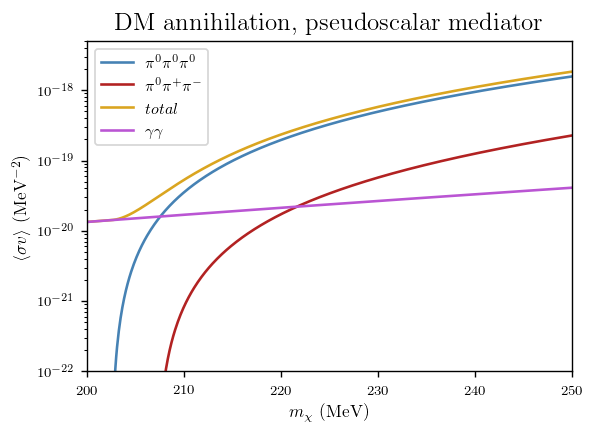

In [18]:
mx_min, mx_max, n_mxs = 200., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1., gpqq=1., gpll=0., gpGG=3., gpFF=2./3.)
# psm = PseudoScalarMediator(mx=200., mp=1e3, gpxx=1., gpuu=muq/vh, gpdd=mdq/vh, gpss=0., gpee=0., gpmumu=0., gpGG=1., gpFF=0.)
# psm = PseudoScalarMediator(mx=200., mp=1e3, gpxx=1., gpuu=-muq/vh, gpdd=-mdq/vh, gpss=0., gpee=0., gpmumu=0., gpGG=1., gpFF=0.)

vx_mw = 1.0e-4  # approximate DM velocity in Milky Way halo

svs_varying_gs = {}

# Compute branching fractions for different couplings
svs_raw = []
for mx in mxs:
    psm.mx = mx
    e_cm = 2. * psm.mx * (1. + 0.5 * vx_mw**2)
    svs_raw.append(psm.cross_sections(e_cm))
    
svs = {fs: [vx_mw * sv[fs] for sv in svs_raw] for fs in psm.list_final_states() + ["total"]}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, sv_list in svs.iteritems():
    if fs in ["g g", "pi0 pi0 pi0", "pi0 pi pi", "total"]:
#     if fs not in ["p p"]:
        plt.plot(mxs, sv_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("DM annihilation, pseudoscalar mediator")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"$\langle \sigma v \rangle$ (MeV$^{-2}$)")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(1e-22, 5e-18)
plt.yscale("log")

# plt.savefig("figures/pseudoscalar_branching_fractions_mfv.pdf")